In [ ]:
import pandas as pd
import numpy as np

from pathlib import Path

from pprint import pprint

from datetime import datetime, timedelta, time

import talib

In [ ]:
from pymongo import MongoClient
from matplotlib import pyplot as plt

%load_ext Cython
%matplotlib notebook

In [ ]:
#stock_list = ['SUNPHARMA','ASIANPAINT', 'ULTRACEMCO', 'DRREDDY', 'TCS','TATASTEEL','HDFC', 'HDFCBANK','HINDALCO', 'ITC', 'BHARTIARTL', 'HCLTECH', 'ADANIPORTS', 'SBIN','INDUSINDBK', 'TECHM','INFY','RELIANCE', 'AXISBANK', 'ONGC', 'ICICIBANK', 'HINDUNILVR','NTPC', 'KOTAKBANK']

Data preparation
===

In [ ]:
#def get_stock_from_universe(univ):
    #client = MongoClient()
    #db = client['universes']
    #return pd.DataFrame(list(db[univ].find({}, { "_id": 0 })))['ticker']

#stock_list = list(set(list(get_stock_from_universe("nifty50"))))
#print(stock_list)
#nifty50 = pd.read_csv("/home/vedant/Downloads/data.csv")
#stock_list = nifty50['Symbol'].to_list()
#stock_list.remove('POWERGRID')

#nifty50 = pd.read_csv("/home/vedant/Downloads/data.csv")
#stock_list = nifty50['Symbol'].to_list()[1:]
#stock_list.remove('POWERGRID')


In [ ]:
#stock_list = ['SUNPHARMA','ASIANPAINT', 'ULTRACEMCO', 'DRREDDY', 'TCS','TATASTEEL','HDFC', 'HDFCBANK','HINDALCO', 'ITC', 'BHARTIARTL', 'HCLTECH', 'ADANIPORTS', 'SBIN','INDUSINDBK', 'TECHM','INFY','RELIANCE', 'AXISBANK', 'ONGC', 'ICICIBANK', 'HINDUNILVR','NTPC', 'KOTAKBANK']#['BANDHANBNK', 'RBLBANK', 'BANKBARODA', 'INDUSINDBK', 'SBIN', 'IDFCFIRSTB', 'FEDERALBNK', 'ICICIBANK', 'PNB', 'AXISBANK', 'HDFCBANK', 'KOTAKBANK']
#stock_list = ['SUNPHARMA','ASIANPAINT', 'ULTRACEMCO','TCS','TATASTEEL', 'HINDALCO', 'HDFC', 'HDFCBANK', 'ITC', 'BHARTIARTL', 'HCLTECH', 'ADANIPORTS', 'SBIN','INDUSINDBK','TECHM','INFY','RELIANCE', 'AXISBANK','ICICIBANK', 'HINDUNILVR']#['BANDHANBNK', 'RBLBANK', 'BANKBARODA', 'INDUSINDBK', 'SBIN', 'IDFCFIRSTB', 'FEDERALBNK', 'ICICIBANK', 'PNB', 'AXISBANK', 'HDFCBANK', 'KOTAKBANK']
#stock_list = ['SUNPHARMA','ASIANPAINT', 'ULTRACEMCO', 'DRREDDY', 'TCS','TATASTEEL','HDFC', 'HDFCBANK','HINDALCO', 'ITC', 'BHARTIARTL', 'HCLTECH', 'ADANIPORTS', 'SBIN','INDUSINDBK', 'TECHM','INFY','RELIANCE', 'AXISBANK', 'ONGC','NTPC','ICICIBANK', 'HINDUNILVR']#['BANDHANBNK', 'RBLBANK', 'BANKBARODA', 'INDUSINDBK', 'SBIN', 'IDFCFIRSTB', 'FEDERALBNK', 'ICICIBANK', 'PNB', 'AXISBANK', 'HDFCBANK', 'KOTAKBANK']
#stock_list = ['ITC','HDFCBANK','TATASTEEL','ADANIPORTS','BHARTIARTL','ULTRACEMCO','HCLTECH','HINDALCO','TECHM','NTPC','HINDUNILVR']#['BANDHANBNK', 'RBLBANK', 'BANKBARODA', 'INDUSINDBK', 'SBIN', 'IDFCFIRSTB', 'FEDERALBNK', 'ICICIBANK', 'PNB', 'AXISBANK', 'HDFCBANK', 'KOTAKBANK']
#stock_list = ['COALINDIA','HINDZINC','TATASTEEL','JSWSTEEL','HINDALCO']
#stock_list = ['HCLTECH','INFY','TCS','NIITTECH','WIPRO']
#stock_list = ['SUNPHARMA','ASIANPAINT', 'ULTRACEMCO', 'DRREDDY', 'TCS','TATASTEEL','HDFC', 'HDFCBANK','HINDALCO', 'ITC', 'BHARTIARTL', 'HCLTECH', 'ADANIPORTS', 'SBIN','INDUSINDBK', 'TECHM','INFY','RELIANCE', 'AXISBANK', 'ONGC', 'ICICIBANK', 'HINDUNILVR','NTPC', 'KOTAKBANK']
#stock_list = ['DABUR','ITC','UPL','GODREJCP','PGHH','JUBLFOOD','MARICO']
#stock_list = ['TATAMOTORS','MARUTI','HEROMOTOCO','BAJAJ-AUTO','TVSMOTOR','EXIDEIND']
#stock_list = ['BANKBARODA','SBIN','IDFCFIRSTB','INDUSINDBK','SUNPHARMA','DRREDDY','UPL','RELIANCE','TECHM','GAIL']
stock_list =['BANDHANBNK','BANKBARODA','PNB','SUNPHARMA','ASIANPAINT','ULTRACEMCO', 'DRREDDY', 'TCS','TATASTEEL','HDFC', 'HDFCBANK','HINDALCO','HCLTECH', 'ADANIPORTS', 'SBIN','TECHM','INFY','RELIANCE', 'AXISBANK', 'ICICIBANK', 'HINDUNILVR','NTPC', 'KOTAKBANK']
#stock_list = ['UPL','SUNPHARMA','BAJAJFINSV','RELIANCE','TECHM','GAIL','MARUTI','SBIN']
portfolio = {}
portfolio = {}
for stock in stock_list:
    try:
        #print("Reading", stock, flush=True)
        data = pd.read_csv(Path("/home/vedant/Downloads/In_sample_data/In_sample_data/{}.csv".format(stock)))

        data.set_index("date", inplace=True)
        data.index = pd.to_datetime(data.index)
        data.index = data.index.tz_localize(None)
    #data.index += timedelta(hours=5, minutes=30)

        portfolio[stock] = data
    except :
        print("cant print for {}".format(stock))

In [ ]:
close = pd.DataFrame(columns=stock_list)
open = pd.DataFrame(columns=stock_list)
high = pd.DataFrame(columns=stock_list)
low = pd.DataFrame(columns=stock_list)
volume = pd.DataFrame(columns=stock_list)

for stock in portfolio.keys():
    close[stock] = portfolio[stock]['close']
    open[stock] = portfolio[stock]['open']
    high[stock] = portfolio[stock]['high']
    low[stock] = portfolio[stock]['low']
    volume[stock] = portfolio[stock]['volume']

In [ ]:
close = close.between_time("09:15", "15:30")
open = open.between_time("09:15", "15:30")
high = high.between_time("09:15", "15:30")
low = low.between_time("09:15", "15:30")
volume = volume.between_time("09:15", "15:30")

In [ ]:
close = close.ffill().bfill()
open = open.ffill().bfill()
high = high.ffill().bfill()
low = low.ffill().bfill()
volume = volume.ffill().bfill()

Functions used
===

In [ ]:
import pandas as pd
import numpy as np
import talib as tb

def SMA(x=pd.DataFrame(),k=30):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.SMA(((x.iloc[:,i]).values.astype(dtype='f8')),timeperiod=k))
    y2=y.set_index(x.index)
    return y2

def EMA(x=pd.DataFrame(),k=30):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.EMA((x.iloc[:,i]).values.astype(dtype='f8'),timeperiod=k))
    y2=y.set_index(x.index)
    return y2

def csRank(x=pd.DataFrame()):
    y2=x.rank(axis=1,pct=True)
    return y2

def csMean(x=pd.DataFrame()):
    y=pd.DataFrame(columns=x.columns,index=x.index)
    for i in range(len(x.columns)):
        y.iloc[:,i]=x.mean(axis=1)
    return y

def tsRank(x=pd.DataFrame(),k=30):
    y2=pd.DataFrame(index=x.index,columns=x.columns)
    for i in range(k,len(x)+1):
        y=(x.iloc[i-k:i,:]).rank(axis=0,pct=True)
        y2.iloc[i-1,:]=y.iloc[-1,:]
    return y2

def Sum(x=pd.DataFrame(),k=30):
    y2=pd.DataFrame(index=x.index,columns=x.columns)
    for i in range(k,len(x)+1):
        y=(x.iloc[i-k:i,:]).sum(axis=0)
        y2.iloc[i-1,:]=y
    return y2

def tsMax(x=pd.DataFrame(),k=30):
    y2=pd.DataFrame(index=x.index,columns=x.columns)
    for i in range(k,len(x)+1):
        y=(x.iloc[i-k:i,:]).max(axis=0)
        y2.iloc[i-1,:]=y
    return y2

def csMax(x=pd.DataFrame()):
    y=pd.DataFrame(columns=x.columns,index=x.index)
    for i in range(len(x.columns)):
        y.iloc[:,i]=x.max(axis=1)
    return y

def tsMin(x=pd.DataFrame(),k=30):
    y2=pd.DataFrame(index=x.index,columns=x.columns)
    for i in range(k,len(x)+1):
        y=(x.iloc[i-k:i,:]).min(axis=0)
        y2.iloc[i-1,:]=y
    return y2

def csMin(x=pd.DataFrame()):
    y=pd.DataFrame(columns=x.columns,index=x.index)
    for i in range(len(x.columns)):
        y.iloc[:,i]=x.min(axis=1)
    return y

def stdDev(x=pd.DataFrame(),k=30):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.STDDEV((x.iloc[:,i]).values.astype(dtype='f8'),timeperiod=k))
    y2=y.set_index(x.index)
    return y2

def tsZscore(x=pd.DataFrame(),k=30):
    y = pd.DataFrame(columns=x.columns, index=x.index)
    y = (x-SMA(x,k))/stdDev(x,k)
    return y

def delay(x=pd.DataFrame(),k=30):
    y=x.shift(periods=k)
    return y

def delta(x=pd.DataFrame(),k=30):
    y=x-delay(x,k)
    return y

def momentum(x=pd.DataFrame(),k=30):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.MOM((x.iloc[:,i]).values.astype(dtype='f8'),timeperiod=k))
    y2=y.set_index(x.index)
    return y2

def RSI(x=pd.DataFrame(),k=30):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.RSI((x.iloc[:,i]).values.astype(dtype='f8'),timeperiod=k))
    y2=y.set_index(x.index)
    return y2

def BBupper(x=pd.DataFrame(),k=30):
    y=pd.DataFrame(columns = x.columns)
    q=pd.DataFrame(columns = x.columns)
    z=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i], q.iloc[:,i], z.iloc[:,i]=pd.Series(tb.BBANDS((x.iloc[:,i]).values.astype(dtype='f8'), timeperiod=k, nbdevup=2, nbdevdn=2, matype=0))
    y2=y.set_index(x.index)
    q2=q.set_index(x.index)
    z2=z.set_index(x.index)
    return y2

def BBlower(x=pd.DataFrame(),k=30):
    y=pd.DataFrame(columns = x.columns)
    q=pd.DataFrame(columns = x.columns)
    z=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i], q.iloc[:,i], z.iloc[:,i]=pd.Series(tb.BBANDS((x.iloc[:,i]).values.astype(dtype='f8'), timeperiod=k, nbdevup=2, nbdevdn=2, matype=0))
    y2=y.set_index(x.index)
    q2=q.set_index(x.index)
    z2=z.set_index(x.index)
    return z2

def HTtrendline(x=pd.DataFrame()):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.HT_TRENDLINE((x.iloc[:,i]).values.astype(dtype='f8')))
    y2=y.set_index(x.index)
    return y2

def KAMA(x=pd.DataFrame(),k=30):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.KAMA((x.iloc[:,i]).values.astype(dtype='f8'),timeperiod=k))
    y2=y.set_index(x.index)
    return y2


def MIDPOINT(x=pd.DataFrame(),k=30):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.MIDPOINT((x.iloc[:,i]).values.astype(dtype='f8'),timeperiod=k))
    y2=y.set_index(x.index)
    return y2


def WMA(x=pd.DataFrame(),k=30):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.WMA((x.iloc[:,i]).values.astype(dtype='f8'), timeperiod=k))
    y2=y.set_index(x.index)
    return y2




def APO(x=pd.DataFrame(), k=12 , l = 26, m = 0):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.APO((x.iloc[:,i]).values.astype(dtype='f8'), fastperiod=k, slowperiod=l, matype=m))
    y2=y.set_index(x.index)
    return y2

def CMO(x=pd.DataFrame(), k=14 ):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.CMO((x.iloc[:,i]).values.astype(dtype='f8'), timeperiod=k))
    y2=y.set_index(x.index)
    return y2

def MACD(x=pd.DataFrame(), k=12, l=26, m=9):
    y=pd.DataFrame(columns = x.columns)
    q=pd.DataFrame(columns = x.columns)
    z=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i], q.iloc[:,i], z.iloc[:,i]=pd.Series(tb.MACD((x.iloc[:,i]).values.astype(dtype='f8'), fastperiod=k, slowperiod=l, signalperiod=m))
    y2=y.set_index(x.index)
    q2=q.set_index(x.index)
    z2=z.set_index(x.index)
    return y2
def MACDsignal(x=pd.DataFrame(), k=12, l=26, m=9):
    y=pd.DataFrame(columns = x.columns)
    q=pd.DataFrame(columns = x.columns)
    z=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i], q.iloc[:,i], z.iloc[:,i]=pd.Series(tb.MACD((x.iloc[:,i]).values.astype(dtype='f8'), fastperiod=k, slowperiod=l, signalperiod=m))
    y2=y.set_index(x.index)
    q2=q.set_index(x.index)
    z2=z.set_index(x.index)
    return q2

def PPO(x=pd.DataFrame(), k=12 , l = 26, m = 0):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.PPO((x.iloc[:,i]).values.astype(dtype='f8'), fastperiod=k, slowperiod=l, matype=m))
    y2=y.set_index(x.index)
    return y2

def ROCP(x=pd.DataFrame(), k=10):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.ROCP((x.iloc[:,i]).values.astype(dtype='f8'), timeperiod=k))
    y2=y.set_index(x.index)
    return y2

def AROONoscillator(x=pd.DataFrame(),x2=pd.DataFrame(), k=14 ):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.AROONOSC((x.iloc[:,i]).values.astype(dtype='f8'),(x2.iloc[:,i]).values.astype(dtype='f8'), timeperiod=k))
    y2=y.set_index(x.index)
    return y2

def ADX(x=pd.DataFrame(),x2=pd.DataFrame(),x3=pd.DataFrame(), k=14 ):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.ADX((x.iloc[:,i]).values.astype(dtype='f8'),(x2.iloc[:,i]).values.astype(dtype='f8'),(x3.iloc[:,i]).values.astype(dtype='f8'), timeperiod=k))
    y2=y.set_index(x.index)
    return y2



def ADXR(x=pd.DataFrame(),x2=pd.DataFrame(),x3=pd.DataFrame(), k=14 ):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.ADXR((x.iloc[:,i]).values.astype(dtype='f8'),(x2.iloc[:,i]).values.astype(dtype='f8'),(x3.iloc[:,i]).values.astype(dtype='f8'), timeperiod=k))
    y2=y.set_index(x.index)
    return y2

def WILLR(x=pd.DataFrame(),x2=pd.DataFrame(),x3=pd.DataFrame(), k=14):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.WILLR((x.iloc[:,i]).values.astype(dtype='f8'),(x2.iloc[:,i]).values.astype(dtype='f8'),(x3.iloc[:,i]).values.astype(dtype='f8'), timeperiod=k))
    y2=y.set_index(x.index)
    return y2

def ULTOSC(x=pd.DataFrame(),x2=pd.DataFrame(),x3=pd.DataFrame(), k=7, l=14, m=28):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.ULTOSC((x.iloc[:,i]).values.astype(dtype='f8'),(x2.iloc[:,i]).values.astype(dtype='f8'),(x3.iloc[:,i]).values.astype(dtype='f8'),timeperiod1=k, timeperiod2=l, timeperiod3=m))
    y2=y.set_index(x.index)
    return y2

def OBV(x=pd.DataFrame(),x2=pd.DataFrame()):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.OBV((x.iloc[:,i]).values.astype(dtype='f8'),(x2.iloc[:,i]).values.astype(dtype='f8')))
    y2=y.set_index(x.index)
    return y2

def ATR(x=pd.DataFrame(),x2=pd.DataFrame(),x3=pd.DataFrame(), k=14 ):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.ATR((x.iloc[:,i]).values.astype(dtype='f8'),(x2.iloc[:,i]).values.astype(dtype='f8'),(x3.iloc[:,i]).values.astype(dtype='f8'),timeperiod=k))
    y2=y.set_index(x.index)
    return y2

def TRANGE(x=pd.DataFrame(),x2=pd.DataFrame(),x3=pd.DataFrame()):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.TRANGE((x.iloc[:,i]).values.astype(dtype='f8'),(x2.iloc[:,i]).values.astype(dtype='f8'),(x3.iloc[:,i]).values.astype(dtype='f8')))
    y2=y.set_index(x.index)
    return y2

def LINEARREG(x=pd.DataFrame(), k=14):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.LINEARREG((x.iloc[:,i]).values.astype(dtype='f8'), timeperiod=k))
    y2=y.set_index(x.index)
    return y2

def LINEARREGintercept(x=pd.DataFrame(), k=14):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.LINEARREG_INTERCEPT((x.iloc[:,i]).values.astype(dtype='f8'), timeperiod=k))
    y2=y.set_index(x.index)
    return y2


def LINEARREGslope(x=pd.DataFrame(), k=14):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.LINEARREG_SLOPE((x.iloc[:,i]).values.astype(dtype='f8'), timeperiod=k))
    y2=y.set_index(x.index)
    return y2

def CEIL(x=pd.DataFrame()):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.CEIL((x.iloc[:,i]).values.astype(dtype='f8')))
    y2=y.set_index(x.index)
    return y2

def FLOOR(x=pd.DataFrame()):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.FLOOR((x.iloc[:,i]).values.astype(dtype='f8')))
    y2=y.set_index(x.index)
    return y2

def ACOS(x=pd.DataFrame()):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.ACOS((x.iloc[:,i]).values.astype(dtype='f8')))
    y2=y.set_index(x.index)
    return y2

def ASIN(x=pd.DataFrame()):
    y=pd.DataFrame(columns = x.columns)
    for i in range(0,len(x.columns)):
        y.iloc[:,i]=pd.Series(tb.ACOS((x.iloc[:,i]).values.astype(dtype='f8')))
    y2=y.set_index(x.index)
    return y2


In [ ]:
%%cython

import numpy as np
import pandas as pd


def calculate_constant_exposure(long[:, :] entry_signal,
                                float long_target, float long_stoploss,
                                float short_target, float short_stoploss,
                                long[:, :] exposure,
                                double[:, :] close, double[:, :] open,
                                double[:, :] high, double[:, :] low,
                                long[:] is_320,long[:] is_916,long[:] is_230, debug=False):
    """
        Given entry_signal with a MINUTE CANDLE SIZE
        returns exposure (true or false) at every datetime
        for every stock
        
        REQUIRES: 
        1. entry_signal is minute wise
    """
    cdef Py_ssize_t num_stocks = entry_signal.shape[1]
    cdef Py_ssize_t num_datetimes = entry_signal.shape[0]

    cdef int holding = 0
    cdef float entry_price = 0.0
    cdef float tp = 0.0
    cdef float sl = 0.0

    cdef int stock = 0
    cdef int cur_date = 0

    for stock in range(num_stocks):
        holding = 0
        entry_price = 0.0
        tp = 0.0
        sl = 0.0

        for cur_date in range(num_datetimes-1):
            exposure[cur_date, stock] = holding

            if (holding == 0) and \
                    (abs(entry_signal[cur_date, stock]) == 1) and\
                    ((tp == 0.0 and sl == 0.0)) and\
                    (not is_320[cur_date]) and (is_916[cur_date]) and (not is_230[cur_date]):
                if debug:
                    print("Entering position", stock, cur_date)

                entry_price = open[cur_date+1, stock]
                holding = entry_signal[cur_date, stock]

                if holding == 1:
                    # Enter long position
                    tp = entry_price*(1+long_target/100.0)
                    sl = entry_price*(1-long_stoploss/100.0)
                elif holding == -1:
                    # Enter short position
                    tp = entry_price*(1-short_target/100.0)
                    sl = entry_price*(1+short_stoploss/100.0)

                if debug:
                    print("Entry price", entry_price)
                    print("Type of trade", holding)
                    print("Target", tp, "Stoploss", sl)
            elif (holding == 1) and\
                    ((high[cur_date, stock] >= tp or low[cur_date, stock] <= sl) or\
                     is_320[cur_date]):
                holding = 0
                entry_price = 0.0
                tp = 0.0
                sl = 0.0

                if debug:
                    print("Exiting long position", stock, cur_date)
                    if is_320[cur_date]:
                        print("Exited due to 3:20")
            elif (holding == -1) and\
                    ((low[cur_date, stock] <= tp or high[cur_date, stock] >= sl) or\
                     is_320[cur_date]):
                holding = 0
                entry_price = 0.0
                tp = 0.0
                sl = 0.0

                if debug:
                    print("Exiting short position", stock, cur_date)
                    if is_320[cur_date]:
                        print("Exited due to 3:20")


    # Always exit all positions at the end date
    for i in range(num_stocks):
        exposure[num_datetimes-1, i] = 0


def get_constant_exposure(close_, open_, high_, low_,
                          is_320, is_916,is_230,
                          entry_signal,
                          long_target, long_stoploss,
                          short_target, short_stoploss,
                          debug):
    exposure = np.zeros_like(close_.values, dtype='int64')

    calculate_constant_exposure((entry_signal.values*1).astype('int64'),
                                long_target, long_stoploss,
                                short_target, short_stoploss,
                                exposure,
                                close_.values, open_.values, high_.values, low_.values,
                                is_320.values,is_916.values,is_230.values , debug)

    final_exposure = pd.DataFrame(exposure, index=close_.index, columns=close_.columns)

    return final_exposure

In [ ]:
%%cython

import numpy as np
cimport numpy as np

import math
cimport libc.math


def signum(x):
    if x > 0:
        return 1
    else:
        return -1


def calculate_pnl(double[:, :] close, double[:, :] open, long[:] is_320,long[:] is_916,long[:] is_230,
                  long[:, :] is_entry, long[:, :] is_exit,
                  long[:, :] exposure, long[:, :] real_exposure,
                  double[:, :] turnover, double[:] mocc_store,
                  double[:, :] pnl,
                  float brokerage_rate, float booksize, float leverage, float n,
                  float slippage, float rms_rate,
                  debug=False, reinvest_profits=False):
    """
        pnl stores realized pnl per trade. It is not cumulative.
    """

    cdef Py_ssize_t num_stocks = is_entry.shape[1]
    cdef Py_ssize_t num_datetimes = is_entry.shape[0]

    cdef float cash = booksize

    cdef float cur_pnl = 0.0
    cdef float full_pnl = 0.0

    cdef np.ndarray[np.int_t, ndim=1] holding_arr = np.zeros(num_stocks, np.int_)
    cdef np.ndarray[np.float_t, ndim=1] qty_arr = np.zeros(num_stocks, np.float_)
    cdef np.ndarray[np.float_t, ndim=1] entry_price_arr = np.zeros(num_stocks, np.float_)
    cdef np.ndarray[np.float_t, ndim=1] margin_occupied = np.zeros(num_stocks, np.float_)

    cdef float mocc = 0.0
    cdef float true_mocc = 0.0
    cdef float slipped = 0.0
    cdef float exit_price = 0.0
    cdef float assigned_money = 0.0

    cdef int stock = 0
    cdef int cur_date = 0

    cdef int num_live_trades = 0

    brokerage_rate /= 100.0
    slippage /= 100.0

    for cur_date in range(num_datetimes-1):
        for stock in range(num_stocks):
            if is_entry[cur_date, stock]:
                if num_live_trades < n:
                    # Calculated assigned money to this trade
                    # It is (cash - (assigned margin).sum())/(n - num_live_trades)
                    # Now it will not use all of this money, because of quantity
                    # being an integer.
                    assigned_money = (cash - mocc)/(n - num_live_trades)

                    holding_arr[stock] = 1
                    qty_arr[stock] = libc.math.floor(assigned_money*leverage/open[cur_date, stock])
                    qty_arr[stock] *= exposure[cur_date, stock]

                    entry_price_arr[stock] = open[cur_date, stock]
                    slipped = open[cur_date, stock]*slippage
                    entry_price_arr[stock] += signum(qty_arr[stock])*slipped

                    turnover[cur_date, stock] = entry_price_arr[stock]*abs(qty_arr[stock])

                    # Set margin allocated to unlevered thing
                    margin_occupied[stock] = assigned_money
                    mocc += assigned_money
                    true_mocc += turnover[cur_date, stock]
                    num_live_trades += 1

                    if debug:
                        print("Entered trade at price", entry_price_arr[stock],
                              "for", stock, "on", cur_date)
                        print("Quantity is (signed)", qty_arr[stock])
                        print("Raw qty unfloored", assigned_money*leverage/open[cur_date, stock])
                else:
                    if debug:
                        print("We are at max trades possible, skipping", stock, "trade")

            real_exposure[cur_date, stock] = holding_arr[stock]
            mocc_store[cur_date] = true_mocc

            # This is not a elif because we need to allow same minute entry and exit
            # So in the same minute both if statements go through, meaning we
            # enter at open but exit at close
            if (holding_arr[stock] == 1) and (is_exit[cur_date, stock]):
                exit_price = close[cur_date, stock]
                slipped = exit_price*slippage
                exit_price -= signum(qty_arr[stock])*slipped
                cur_pnl = (exit_price - entry_price_arr[stock])*qty_arr[stock]
                brokerage = brokerage_rate*(exit_price + entry_price_arr[stock])*abs(qty_arr[stock])

                if is_320[cur_date] == 1 and qty_arr[stock] != 0:
                    brokerage += rms_rate

                pnl[cur_date, stock] = cur_pnl - brokerage

                full_pnl += pnl[cur_date, stock]

                # Make margin allocated zero
                mocc -= margin_occupied[stock]
                true_mocc -= entry_price_arr[stock]*abs(qty_arr[stock])
                margin_occupied[stock] = 0

                cash = booksize + full_pnl
                cash = max(cash, 0)
                if not reinvest_profits:
                    cash = min(cash, booksize)

                num_live_trades -= 1

                if debug:
                    print("Exiting", stock, "on", cur_date)
                    print("Exited with pnl", cur_pnl, "brokerage", brokerage)
                    print("Entry price was", entry_price_arr[stock])
                    print("Exit price:", exit_price)
                    print("Quantity was:" , qty_arr[stock])
                    print("Current live trades", num_live_trades)

                holding_arr[stock] = 0
                entry_price_arr[stock] = 0.0
                qty_arr[stock] = 0

Backtester configurations
===

In [ ]:
booksize = 20000
leverage = 3    # cash behaves like cash*leverage

# Max simultaneous trades to take
n = 2

candle_size = '30min'
base = 9.25*60

# In percentage
brokerage_rate = 0.025
slippage = 0.05
# Intraday 3:20 square off fee
rms_rate = 0

# These are in percentage
long_target = 1.75
long_stoploss = 0.75
short_target= 1.75
short_stoploss =0.75

debug = False

reinvest_profits = False
backtest_savefile_name = "backtest.bts"

In [ ]:
# close.to_csv("testing_error_2.csv")

In [ ]:
rclose = close.resample(candle_size, base=base).last().between_time("09:15", "15:30").dropna()
rclose = rclose.ffill().bfill()

ropen = open.resample(candle_size, base=base).first().between_time("09:15", "15:30").dropna()
ropen = ropen.ffill().bfill()

rhigh = high.resample(candle_size, base=base).max().between_time("09:15", "15:30").dropna()
rhigh = rhigh.ffill().bfill()

rlow = low.resample(candle_size, base=base).min().between_time("09:15", "15:30").dropna()
rlow = rlow.ffill().bfill()

rvolume = volume.resample(candle_size, base=base).sum().between_time("09:15", "15:30").dropna()
rvolume = rvolume.ffill().bfill()

# rclose.head()

Actual backtest
===

In [ ]:
ema3 = EMA(rclose, 3)
ema5= EMA(rclose, 5)
ema13 = EMA(rclose, 9)
ema21 = EMA(rclose, 21)
ema80 = EMA(rclose, 80)
rsi = RSI(rclose,7)
rsi2 = RSI(rclose,14)
macd= MACD(rclose,6,13,5)
macdsignal = MACDsignal(rclose,6,13,5)
adx = ADX(rhigh,rlow,rclose,7)
# ret1  = (rclose-rclose.shift(1))/rclose.shift(1)
# sigma = ret1.rolling(20).std()
# candles = 1*(rclose>ropen)+0
upper_band = SMA(rclose,20)+2*stdDev(rclose,20)
lower_band = SMA(rclose,20)-2*stdDev(rclose,20)
bb = (upper_band-lower_band)/SMA(rclose,20)
# ema80 = EMA(rclose, 80)
returns  = rclose.pct_change()
cmo = CMO(rclose,14)
location = ((2*rclose-(rhigh.rolling(375).max()+rlow.rolling(375).min()))/(rhigh.rolling(375).max()-rlow.rolling(375).min()))  
# risk_free_rate = 0.06
# lamda = sigma/risk_free_rate
# q = np.sqrt(-(risk_free_rate)/(sigma**4)*(sigma**2+risk_free_rate)*(1/rclose**2-lamda))
# d = 2*rclose.rolling(10).std()#np.sqrt(1/lamda) -close
# T = np.e**(-2*q*d)

In [ ]:
r = WILLR(rhigh,rlow,rclose,14)

In [ ]:
P = (rhigh.shift(1)+rlow.shift(1)+rclose.shift(1))/3
R1 = 2*P - rlow
S1 = 2*P - rhigh
R2 = P + (R1-S1)
S2 = P-(R1+S1)


In [ ]:
#moving avg
strength = (rclose-ropen)/(rhigh-rlow)

In [ ]:
#csRank(returns/bb[bb<0.03])
rvolume.shape,rclose.shape

((18979, 11), (12312, 11))

In [ ]:
def CCI(High,Low,Close, ndays):
    TP = High + Low + Close/ 3
    CCI= pd.DataFrame((TP -  TP.rolling(ndays).mean()) / (0.015 *TP.rolling(ndays).std()))  
    return CCI
cci = CCI(rhigh,rlow,rclose,14)



In [ ]:
long_entry_signal= (cci.shift(1)<-100) &(cci>0) &(ropen>rclose.shift(1)*1.005))
short_entry_signal = ((cci.shift(1)>100) &(cci<0)&(ropen<rclose.shift(1)*1.005))

entry_signal = (long_entry_signal*1 - short_entry_signal*1).shift(1)

In [ ]:
# pd.set_option('display.max_rows', 500)
# (entry_signal)

In [ ]:
is_320 = pd.Series(data=[0]*close.shape[0], index=close.index)
is_320.loc[close.between_time('15:00', '15:30').index] = 1

In [ ]:
is_916 = pd.Series(data=[0]*close.shape[0], index=close.index)
is_916.loc[close.between_time('09:17', '15:30').index] = 1

In [ ]:
is_230 = pd.Series(data=[0]*close.shape[0], index=close.index)
is_230.loc[close.between_time('14:30', '15:30').index] = 1

In [ ]:
%%time

msignal = entry_signal.reindex(close.index).fillna(False)

exposure = get_constant_exposure(close, open, high, low,
                                 is_320,is_916,is_230, msignal,
                                 long_target, long_stoploss,
                                 short_target, short_stoploss,
                                 debug=False)

CPU times: user 2.12 s, sys: 464 ms, total: 2.59 s
Wall time: 3.88 s


In [ ]:
# Entry signal if this cell isn't zero but the previous was, entry this candle
is_entry = (exposure != 0) & (exposure.shift(1).fillna(0) == 0)
# Exit if this cell is not zero but the next one is zero (exit at the end of this candle)
is_exit = (exposure != 0) & (exposure.shift(-1).fillna(0) == 0)

In [ ]:
print("Maximum trades taken in a day if we had infinite money")
print((is_entry.sum(axis=1).resample('1D').sum()).max())

Maximum trades taken in a day if we had infinite money
23


In [ ]:
%%time

pnl = np.zeros_like(close.values)
turnover = np.zeros_like(close.values)
real_exposure = np.zeros_like(exposure.values)
mocc_store = np.zeros(close.shape[0])
calculate_pnl(close.values, open.values, is_320.values,is_916.values,is_230.values,
              is_entry.values*1, is_exit.values*1,
              exposure.values, real_exposure,
              turnover, mocc_store, pnl,
              brokerage_rate, booksize, leverage, n, slippage, rms_rate,
              debug=debug,
              reinvest_profits=reinvest_profits)

CPU times: user 224 ms, sys: 0 ns, total: 224 ms
Wall time: 455 ms


In [ ]:
turnover = pd.DataFrame(turnover, index=close.index, columns=stock_list)
real_exposure = pd.DataFrame(real_exposure, index=close.index, columns=stock_list)
mocc_store = pd.Series(mocc_store, index=close.index)

pnl = pd.DataFrame(pnl, columns=stock_list, index=close.index)

In [ ]:
# t = turnover['2017-07-10']
# t[(t != 0).any(axis=1)]

In [ ]:
# t = pnl['2017-07-10']
# t[(t != 0).any(axis=1)]


In [ ]:
pd.options.display.max_columns = None

In [ ]:
(pnl != 0).any(axis=1).resample('1D').sum().dropna().idxmax()

Timestamp('2018-10-26 00:00:00', freq='D')

Statistics
===

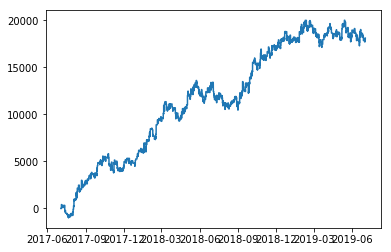

In [ ]:
%matplotlib inline

plt.plot(pnl.sum(axis=1).cumsum(), label='PnL')

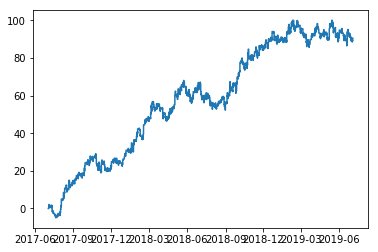

In [ ]:
apnl = pnl.sum(axis=1)
plt.plot(apnl.cumsum()/booksize*100)

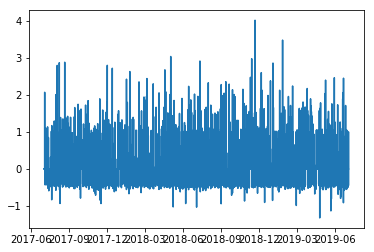

In [ ]:
%matplotlib inline

plt.plot(apnl/booksize*100)

In [ ]:
apnl.tail()

date
2019-07-02 15:25:00    0.0
2019-07-02 15:26:00    0.0
2019-07-02 15:27:00    0.0
2019-07-02 15:28:00    0.0
2019-07-02 15:29:00    0.0
dtype: float64

In [ ]:
apnl2 = pd.DataFrame(apnl.resample('M',label='right').sum())
apnl2 # See consecutive down months
apnl2['month'] = apnl2.index.month


In [ ]:
# pnl.sum().sort_values()

In [ ]:
# apnl2[0]
import matplotlib.pyplot as plt

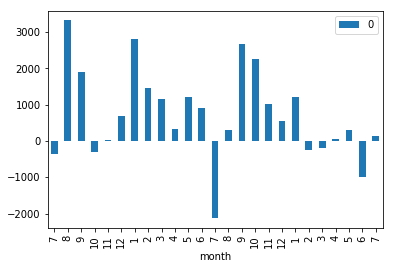

In [ ]:
apnl2.plot.bar(x='month')

In [ ]:
print("Final PnL")
print(apnl.sum())
print("Returns",apnl.sum()*100/booksize)

Final PnL
18111.05922028852
('Returns', 90.5552961014426)


In [ ]:
dailypnl = apnl.groupby(apnl.index.date).sum()
print("Up days", (dailypnl > 0).sum())
print("Down days", (dailypnl < 0).sum())
print("Hit Ratio",(dailypnl > 0).sum()/((dailypnl < 0).sum()+(dailypnl > 0).sum()))
print("Total Days",((dailypnl < 0).sum()+(dailypnl > 0).sum()))
print("Total Trades",(pnl != 0).sum().sum())

('Up days', 259)
('Down days', 234)
('Hit Ratio', 0)
('Total Days', 493)
('Total Trades', 4539)


In [ ]:
# check = pnl
# check_series = (check != 0).any(axis=1)
# check.loc[check_series].to_csv("check.csv")
pnl.sum()

In [ ]:
print("MDD")
print(((apnl.cumsum().cummax() - apnl.cumsum())/(apnl.cumsum().cummax() + booksize)).max()*100)

MDD
9.367542184279138


In [ ]:
# rclose
pnl.sum().sort_values(ascending = False)

In [ ]:
trades_exit

In [ ]:
trades_entry

# trades_entry.to_csv("entry_ema_crossover.csv")

In [ ]:
live_result = pd.DataFrame(apnl.resample('D',label='right').sum())
live_result.to_csv('gapup.csv')

In [ ]:
new_turnover_df = ((turnover['HDFC'])[turnover['HDFC']!=0])

In [ ]:
new_turnover_df

## Write backtest data to disk


In [ ]:
import pickle

In [ ]:
backtest_params = {
    "booksize": booksize,
    "leverage": leverage,
    "n": n,
    "candle_size": candle_size,
    "base": base,
    "brokerage_rate": brokerage_rate,
    "slippage": slippage,
    "rms_rate": rms_rate,
    "long_target": long_target,
    "long_stoploss": long_stoploss,
    "short_target": short_target,
    "short_stoploss": short_stoploss,
    "reinvest_profits": reinvest_profits,
    "exposure": exposure.to_json(),
    "real_exposure": real_exposure.to_json(),
    "pnl": pnl.to_json(),
    "turnover": turnover.to_json(),
    "margin_occupied": mocc_store.to_json()
}

In [ ]:
pickle.dump(backtest_params, fileopen(backtest_savefile_name, "wb"))

Sanity checks
===

In [ ]:
# Sanity check that number of exits == number of entries
# Should be true
((is_entry == True).sum(axis=0) == (is_exit == True).sum(axis=0)).all()

In [ ]:
(pnl != 0).sum().sum(), (pnl > 0).sum().sum()

In [ ]:
is_entry[is_entry.any(axis=1)]

In [ ]:
pnl.dropna().head()